# Text to RDF
* 텍스트 명령어(트리플 등 입력)을 통해서 RDF 생성하기
* RDF 그래프 객체를 시각화하기
* 트리플 구조를 `pandas` 데이터프레임으로 파싱하기
* RDF 그래프 객체를 RDF-XML 등의 파일로 저장하기

* https://hodubab.tistory.com/81
* https://rdflib.readthedocs.io/_/downloads/en/4.2.2/pdf/

# Set Up

## Imports

In [10]:
import rdflib
from rdflib import URIRef, BNode, Literal, Namespace
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.namespace import RDF, FOAF

import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# RDF 그래프 그려주는 거
import io
from io import StringIO, BytesIO
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

## Functions

In [7]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png() # PNG 이미지를 생성함
    
    display(Image(png)) # 이미지를 표시함

In [4]:
def make_class(class_name, base_URI:'Str'):
    
    URI = base_URI + class_name
    globals()['class_instance'] = rdflib.URIRef(URI)
    
    return class_instance

# Input

## RDF 설정

In [12]:
URI = 'http://example.org/'

In [13]:
n = Namespace(URI)

In [15]:
n.bob, n.eve

(rdflib.term.URIRef('http://example.org/bob'),
 rdflib.term.URIRef('http://example.org/eve'))

In [27]:
g = rdflib.Graph()

In [23]:
Frank = {'gender': 'men', 'married': 'Susie'}
Peter = {'father': 'Frank', 'likes': 'Sandra'}
Sophie = {'gender': 'women', 'likes': 'Peter'}

In [24]:
person_list = ['Sophie', 'Frank', 'Peter']
property_list = [Sophie, Frank, Peter]

### 타 리소스와 관계 추가

In [25]:
for person, prop in zip(person_list, property_list):
    
    vname = person
    for p,v in prop.items(): #property==key, values
        
        # value 값이 string일 경우 Literal로 추가한다
        if type(v) == 'str': 
            person_instance = make_class(vname, URI)
            globals()[vname] = make_class(vname, URI)
            #print(person_instance, globals()[vname])
    
            g.add((person_instance, globals()[vname], rdflib.Literal(v)))
        
        # 숫자형이 아닐 경우 관게형으로 추가한다
#         else:
#             #print(prop)
#             #print(f'p:{p}')
#             #print(f'v:{v}')
#             #print(type(v))
#             person_instance = make_class(vname, URI)
#             #print(person_instance)
#             globals()[vname] = make_class(vname, URI)
#             #print(globals()[vname])
    
#             globals()[p] = make_class(str(v), '')
            
#             #print(globals()[p])
    
#             g.add((person_instance, globals()[vname], globals()[p]))

In [28]:
visualize(g)

### Value값 추가


(dot.exe:14164): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:14164): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:14164): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



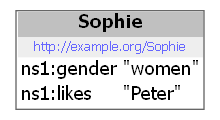

In [37]:
visualize(g)

In [22]:

list(Sophie.keys())


['gender', 'likes']

In [29]:
for p in person_list:
    globals()[p] = n.p
    
for pro in property_list:
    globals()[pro] = n.pro

TypeError: unhashable type: 'dict'

In [32]:
g = rdflib.Graph()

In [33]:
g.add((Sophie, gender, rdflib.Literal('women')))
g.add((Sophie, likes, Peter))

g.add((Frank, gender, rdflib.Literal('men')))
g.add((Frank, married, Susie))

g.add((Peter, father, Frank))
g.add((Peter, likes, Sandra))
g.add((Peter, mother, Susie))

g.add((Sandra, bornIn, rdflib.Literal(1980)))
g.add((Sandra, gender, rdflib.Literal('women')))

NameError: name 'gender' is not defined

In [16]:
visualize(g)

str_in = StringIO('''@prefix Person: <http://example.org/> .

Person:Sophie Person:gender "women" ;
    Person:likes Person:Peter .

Person:Frank Person:bornIn "1949" ;
    Person:gender "Men" ;
    Person:married Person:Susie .

Person:Peter Person:father Person:Frank ;
    Person:gender "Men" ;
    Person:likes Person:Sandra ;
    Person:mother Person:Susie .

Person:Sandra Person:bornIn "1980" ;
    Person:gender "women" .

Person:Susie Person:bornIn "1956" ;
    Person:gender "women" .'''
)

g = rdflib.Graph() # RDF 그래프 객체를 생성
g.parse(str_in, format = 'n3')

## Bob

In [34]:
bob = make_class('Bob', URI)
bob

rdflib.term.URIRef('http://example.org/Bob')

In [35]:
g = rdflib.Graph()
g.add((bob, rdflib.namespace.RDF.type, rdflib.namespace.FOAF.Person)) # 밥의 유형은 사람이다
g.add((bob, rdflib.namespace.FOAF.name, rdflib.Literal('Bob'))) # 밥의 이름은 Bob이다

<Graph identifier=N2188e052f4614fbe9c5ac8d8437af07f (<class 'rdflib.graph.Graph'>)>


(dot.exe:4008): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:4008): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:4008): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



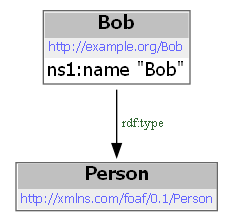

<Graph identifier=N2188e052f4614fbe9c5ac8d8437af07f (<class 'rdflib.graph.Graph'>)>

In [36]:
visualize(g)
g.serialize('test.rdf', format = 'pretty-xml')

## Continent

In [37]:
URI = 'http://example.org/'

In [38]:
property_list = ['has_border_with', 'located_in']
country_list = ['germany', 'france', 'china', 'mongolia']
continent_list = ['europa', 'asia']

In [39]:
for p in property_list:
    globals()[p] = make_class(p, URI)
    
for c in country_list:
    globals()[c] = make_class(c, URI)
    
for cn in continent_list:
    globals()[cn] = make_class(cn, URI)

In [40]:
g = rdflib.Graph()

In [41]:
g.add((germany, has_border_with, france))
g.add((china, has_border_with, mongolia))
g.add((germany, located_in, europa))
g.add((france, located_in, europa))
g.add((china, located_in, asia))
g.add((mongolia, located_in, asia))

<Graph identifier=N13cc45a064d945328eb4b67a4b43c679 (<class 'rdflib.graph.Graph'>)>


(dot.exe:13704): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:13704): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



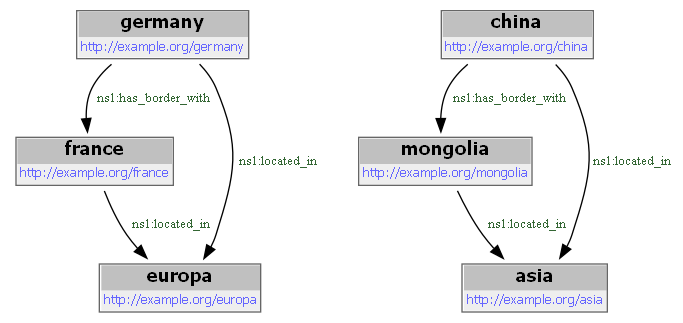

In [42]:
visualize(g)

#### 그래프를 RDF-XML로 만들어 저장하기

In [43]:
g.serialize('test.rdf', format = 'pretty-xml')

<Graph identifier=N13cc45a064d945328eb4b67a4b43c679 (<class 'rdflib.graph.Graph'>)>

# RUN
* 함수를 실행하여 결과물을 생성하기